# Lotka-volterra model, 2 populations



## Data generation with given parameters

The solver successfully reached the end of the integration interval.


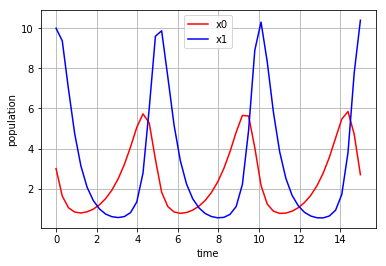

In [198]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import linalg

# Definition of variables
nesp = 2
#rmax = 100
#bmax = 1

#r = rmax * np.random.rand(nesp)                  #
#b = 2*bmax * np.random.rand(nesp,nesp) - bmax    #
#x0 = 19 * np.random.rand(nesp) + 1
r = np.array([1,-2])
b = np.array([[0,-0.3],[0.8,0]])
t0 = 0      # Time evaluation starting point
tf = 15    # Time evaluation finishing point
x0 = np.array([3,10])



# Generate time evaluation points to show
t_points = np.linspace(t0, tf, 50)

# Equation to solve
def lv_equation(t, x):
    return x * (r + b @ x)

# Solution of equation
sol = integrate.solve_ivp(lv_equation, (0,tf), x0, t_eval=t_points)

# Display
print(sol.message)
plt.plot(sol.t, sol.y[0], '-r', label='x0')
plt.plot(sol.t, sol.y[1], '-b', label='x1') 
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

## Gaussian noise addition

Mean $\mu = 0$, variance $\sigma^2 = \text{var}$

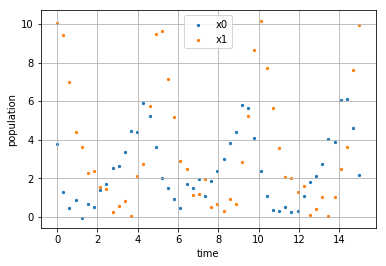

In [199]:
var = 0.4
noisy_data = sol.y + (var * np.random.randn(np.shape(sol.y)[0], np.shape(sol.y)[1]) )

plt.scatter(sol.t, noisy_data[0], s=5 ,label='x0')
plt.scatter(sol.t, noisy_data[1], s=5 ,label='x1') 
plt.grid()
plt.legend(loc='best')
plt.ylabel('population')
plt.xlabel('time')
plt.show()

## Spline interpolation

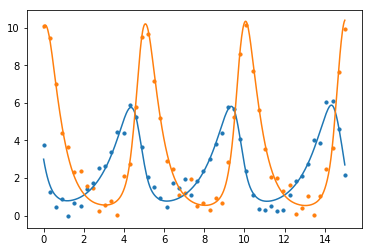

In [210]:
from scipy import interpolate
cs0 = interpolate.CubicSpline(t_points, sol.y[0])
cs1 = interpolate.CubicSpline(t_points, sol.y[1])
tnew = np.linspace(t0, tf, 500)

plt.plot(tnew,cs0(tnew), label='interpolated x0')
plt.plot(tnew,cs1(tnew), label='interpolated x1')
plt.scatter(sol.t, noisy_data[0], s=10, label='x0')
plt.scatter(sol.t, noisy_data[1], s=10, label='x1') 
plt.show()